Partie 2 : Clustering


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster



In [4]:
import sklearn


In [5]:
from sklearn.preprocessing import StandardScaler #pour standaridiser les données
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [28]:
from statistics import mean


In [395]:
data_set = pd.read_csv('/Users/helmisaddem/Documents/new_data_set.csv')

In [396]:
data_set.head()

,zone,population_milles_hab,evolution_population_pct,consommation_volaille_pct,TDI,disponibilite_alimentaire_en_quantite_(kg/personne/an),PIB_par_habitant,indice_stabilite_politique,pib_pct_croissance,RNB_par_habitant
0,Afrique du Sud,57009.756,1.40,6.37,24.27,35.69,6723.928582,-0.28,17.703799,6537.504869
1,Albanie,2884.169,-0.45,1.29,74.51,16.36,4521.752217,0.38,9.765943,4532.791977
2,Algérie,41389.189,1.72,0.80,0.72,6.38,4134.936055,-0.92,6.287892,4081.775086
3,Allemagne,82658.409,0.12,2.06,49.24,19.47,44670.222282,0.59,6.441276,45734.557501
4,Angola,29816.766,3.57,1.85,86.83,10.56,4042.681403,-0.38,20.766646,3791.443851


In [ ]:
#Classification ascendante hiérarchique : 

In [423]:
 data_set_only_quant = data_set_only_quant[["consommation_volaille_pct", "TDI", "indice_stabilite_politique", "RNB_par_habitant", "population_milles_hab", "pib_pct_croissance"]]


In [409]:
scaler = StandardScaler()
data_set_only_quant_scaled = scaler.fit_transform(data_set_only_quant)

In [410]:
indicators = data_set_only_quant.columns.to_numpy()

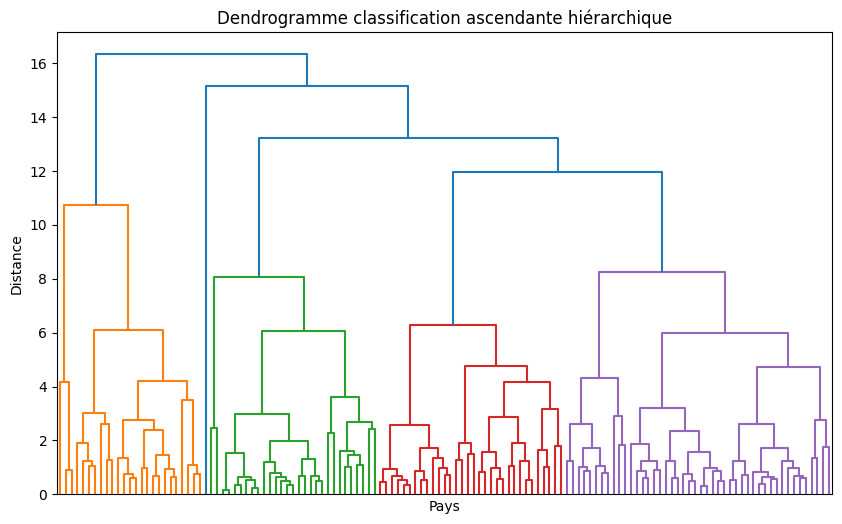

In [411]:
#matrice de liaison
matrice_liaison = linkage(data_set_only_quant_scaled, method='ward', metric='euclidean')

# dendrogramme
fig, ax = plt.subplots(figsize=(10, 6))

dendrogramme = dendrogram(matrice_liaison, no_labels=True, orientation='top', ax=ax)

ax.set_title('Dendrogramme classification ascendante hiérarchique')
ax.set_xlabel('Pays')
ax.set_ylabel('Distance')

plt.show()

del  fig, ax, dendrogramme

In [412]:
nbre_clusters = range(2, 21) 
silhouette_coefs = []

# Calcul du score  Silhouette moyen pour chaque valeur du nombre de clusters
for i in nbre_clusters:
    clustering = fcluster(matrice_liaison, t = i, criterion = 'maxclust')
    silhouette_coef_moy = silhouette_score(data_set_only_quant_scaled, clustering)
    silhouette_coefs.append(silhouette_coef_moy)



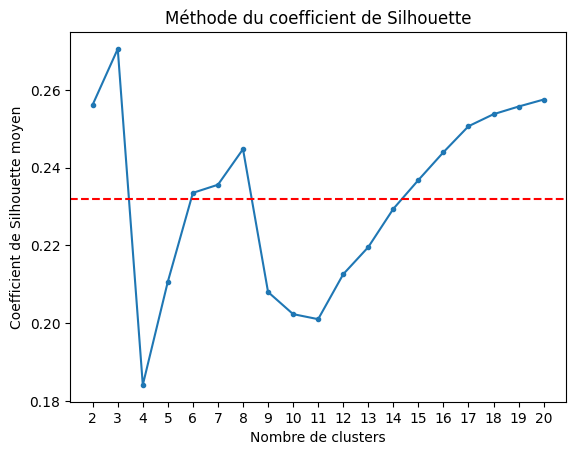

In [288]:
# Traçage du graph
fig, ax = plt.subplots()

plt.plot(nbre_clusters, silhouette_coefs, marker='.')
plt.axhline(y=mean(silhouette_coefs), linestyle = '--', color='r')

ax.xaxis.set_major_locator(ticker.IndexLocator(1, 0))

ax.set_xlabel('Nombre de clusters')
ax.set_ylabel('Coefficient de Silhouette moyen')
ax.set_title('Méthode du coefficient de Silhouette')

plt.show()

In [413]:
#nombre de clusters choisi = 15

# nombre de cluster = 15
clustering = fcluster(matrice_liaison, t=15, criterion='maxclust')   


data_set['cluster'] = clustering
#Cela nous permet notamment d'affiche les pays qui composent chaque groupe.


clusters = np.sort(data_set['cluster'].unique())

# Liste des pays de chaque cluster
for cluster in clusters:
    n_pays = len(
        data_set.loc[data_set['cluster'] == cluster, 'zone'])
    liste_pays = list(
        data_set.loc[data_set['cluster'] == cluster, 'zone'])

    print(f'Cluster {cluster} - {n_pays} pays')
    print(f'{liste_pays}')

del clusters, cluster, n_pays, liste_pays

Cluster 1 - 3 pays
['Belgique', 'Chine - RAS de Hong-Kong', 'Pays-Bas']
Cluster 2 - 7 pays
['Chine - RAS de Macao', 'Danemark', 'Irlande', 'Islande', 'Luxembourg', 'Norvège', 'Suisse']
Cluster 3 - 15 pays
['Allemagne', 'Australie', 'Autriche', 'Canada', 'Espagne', "États-Unis d'Amérique", 'Finlande', 'France', 'Grèce', 'Italie', 'Japon', 'Nouvelle-Zélande', 'République de Corée', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Suède']
Cluster 4 - 2 pays
['Égypte', 'Venezuela (République bolivarienne du)']
Cluster 5 - 18 pays
['Algérie', 'Azerbaïdjan', 'Bosnie-Herzégovine', 'Cameroun', "Côte d'Ivoire", 'Kenya', 'Niger', 'Ouganda', 'Paraguay', 'Pérou', 'République populaire démocratique de Corée', 'Rwanda', 'Sénégal', 'Serbie', 'Sri Lanka', 'Thaïlande', 'Togo', 'Viet Nam']
Cluster 6 - 9 pays
['Indonésie', 'Liban', 'Nigéria', 'Pakistan', 'Philippines', 'Tchad', 'Tunisie', 'Turquie', 'Yémen']
Cluster 7 - 13 pays
['Belize', 'Colombie', 'El Salvador', 'Équateur', 'Guatemala', 'Guyana

In [414]:
exploration_clusters = data_set.groupby('cluster')[indicators].mean().reset_index()

In [ ]:
#exploration_kmeans_clusters = pd.DataFrame(
    #scaler.inverse_transform(clustering.cluster_centers_)).T


#exploration_kmeans_clusters = exploration_kmeans_clusters.set_index(indicators)
#exploration_clusters.columns = exploration_clusters.columns + 1


In [385]:
exploration_clusters.head(15)

,cluster,consommation_volaille_pct,TDI,indice_stabilite_politique,RNB_par_habitant,population_milles_hab,pib_pct_croissance
0,1,3.373333,260.396667,0.726667,46731.755325,1.191581e+04,6.155631
1,2,2.358571,59.858571,1.201429,70869.080466,3.683796e+03,9.205294
2,3,3.006000,22.313333,0.685333,41967.226890,6.173718e+04,5.233780
3,4,2.735000,6.480000,-1.345000,4792.219893,6.292254e+04,-20.932630
4,5,1.013333,7.452778,-0.515556,2995.464200,2.828821e+04,7.455744
5,6,1.530000,8.952222,-1.641111,3820.471020,1.012027e+05,1.187660
6,7,4.136923,8.433846,-0.460769,4674.970965,3.155107e+04,5.480069
7,8,6.417500,94.532500,0.400000,28012.604473,3.478707e+03,6.671519
8,9,6.244667,13.230667,0.122667,13501.765827,2.908794e+04,8.510214
9,10,1.843750,43.381250,-0.018750,5186.052115,1.268021e+04,18.286085


In [ ]:
data_set.groupby('cluster')[indicators].mean().reset_index().drop(columns=["cluster"]).T.style.background_gradient(axis='columns', cmap='coolwarm').format('{:.2f}')

In [374]:
exploration_clusters.loc[exploration_clusters['cluster'].isin([1, 2, 3, 12])].round(2).reset_index().drop(columns=["index"])

,cluster,consommation_volaille_pct,TDI,indice_stabilite_politique,RNB_par_habitant,population_milles_hab,pib_pct_croissance
0,1,3.37,260.40,0.73,46731.76,11915.81,6.16
1,2,2.36,59.86,1.20,70869.08,3683.80,9.21
2,3,3.01,22.31,0.69,41967.23,61737.18,5.23
3,12,2.31,46.10,0.81,16690.37,5840.61,9.45


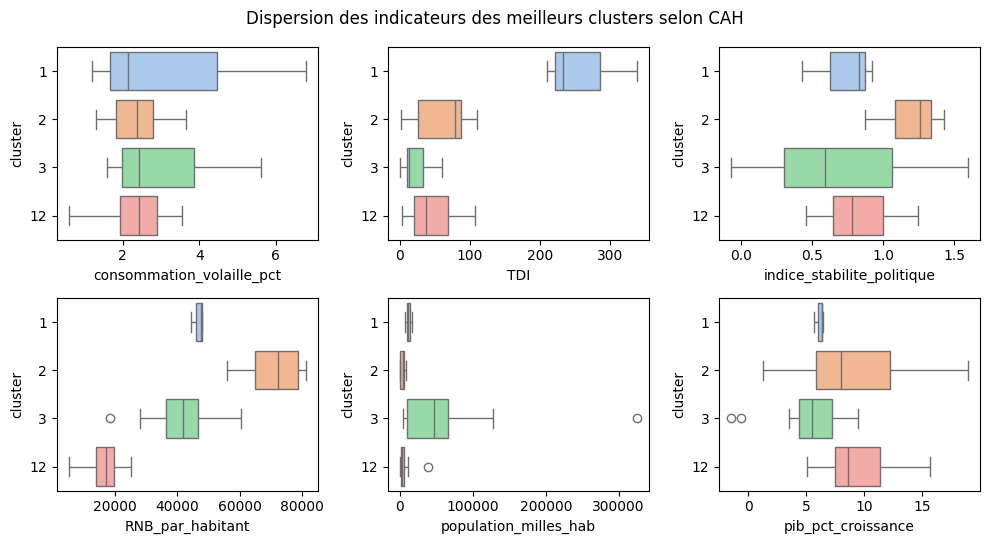

In [377]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5.5))

for i, indicateur in enumerate(indicators):
        r = i // 3
        c = i % 3
        sns.boxplot(data=data_set.loc[data_set["cluster"].isin([1, 2, 3, 12])].round(2), x=indicateur,
                    y="cluster", orient='h',
                    ax=axs[r, c], palette="pastel", hue="cluster", legend=False)
        
    # Supprime les graphiques vides
[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

fig.suptitle('Dispersion des indicateurs des meilleurs clusters selon CAH')

fig.tight_layout()

plt.show()

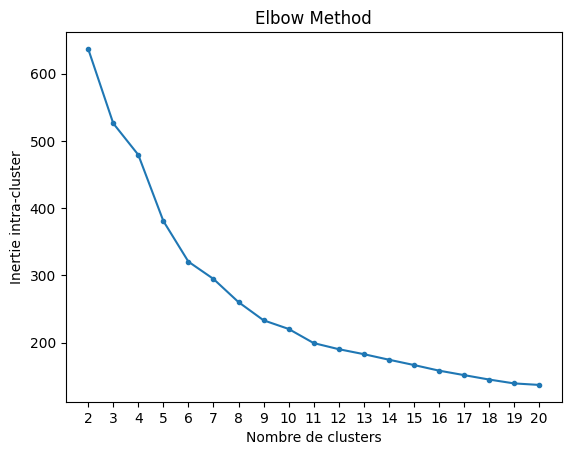

In [422]:
# Méthode K-means :

#Calcul de l'inertie intra cluster
inertie_intra_cluster = []
for i in range(2,21):
    clustering = KMeans(n_clusters=i, n_init='auto', init='random',
                      random_state=0)
    clustering = clustering.fit(data_set_only_quant_scaled)
    inertie_intra_cluster.append(clustering.inertia_)

# Traçage du graphique
fig, ax = plt.subplots()

plt.plot(range(2,21), inertie_intra_cluster, marker='.')
#plt.axhline(y=inertie_intra_cluster[12], linestyle = '--', color='r')


ax.xaxis.set_major_locator(ticker.IndexLocator(1, 0))

ax.set_xlabel('Nombre de clusters')
ax.set_ylabel('Inertie intra-cluster')
ax.set_title('Elbow Method')

plt.show()

del inertie_intra_cluster, i, clustering, fig, ax

In [ ]:
#droite rouge ou seuil : valeur à partir de laquelle la courbe commence à s'aplatir


In [378]:
# Verification par le coefficient de silouhette : 

silhouette_coefs = []


for i in range(2, 21):
    clustering = KMeans(n_clusters=i, n_init='auto', init='random',
                      random_state=0)
    clustering = clustering.fit(data_set_only_quant_scaled)
    silhouette_coef_moy = silhouette_score(data_set_only_quant_scaled, clustering.labels_)
    silhouette_coefs.append(silhouette_coef_moy)


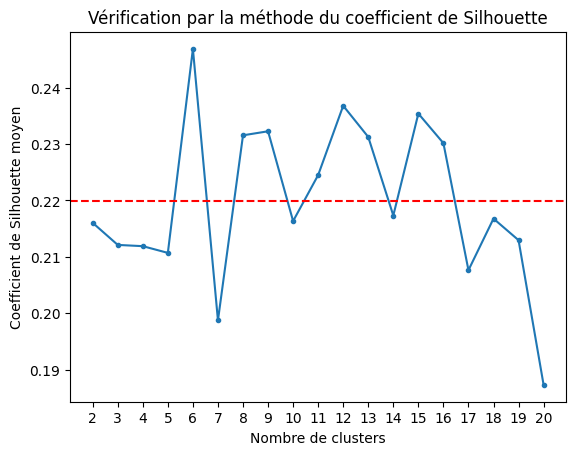

In [379]:
# Trace le graphique
fig, ax = plt.subplots()

plt.plot(range(2, 21), silhouette_coefs, marker='.')
plt.axhline(y=np.mean(silhouette_coefs), linestyle = '--', color='r')

# Définit la position des graduations
ax.xaxis.set_major_locator(ticker.IndexLocator(1, 0))

ax.set_xlabel('Nombre de clusters')
ax.set_ylabel('Coefficient de Silhouette moyen')
ax.set_title('Vérification par la méthode du coefficient de Silhouette')

plt.show()    





In [418]:
#Effectue le clustering avec fixation du nombre de clusters à 11
clustering = KMeans(n_clusters=12, n_init='auto', init='random',
                    random_state=0)
clustering.fit(data_set_only_quant_scaled)

KMeans(init='random', n_clusters=12, random_state=0)

In [419]:
data_set['cluster_kmeans'] = clustering.labels_ + 1

clusters = np.sort(data_set['cluster_kmeans'].unique())


for i in clusters:
    nbre_pays = len(
        data_set.loc[data_set['cluster_kmeans'] == i, 'zone'])
    liste_pays = list(
        data_set.loc[data_set['cluster_kmeans'] == i, 'zone'])

    print(f'Cluster {i} - {nbre_pays} pays')
    print(f'{liste_pays}')

del clusters, i, nbre_pays, liste_pays

Cluster 1 - 18 pays
['Allemagne', 'Australie', 'Autriche', 'Canada', 'Chine - RAS de Macao', 'Danemark', "États-Unis d'Amérique", 'Finlande', 'France', 'Irlande', 'Islande', 'Japon', 'Luxembourg', 'Norvège', 'Nouvelle-Zélande', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'Suède', 'Suisse']
Cluster 2 - 19 pays
['Argentine', 'Belize', 'Bolivie (État plurinational de)', 'Brésil', 'Colombie', 'Costa Rica', 'El Salvador', 'Équateur', 'Guatemala', 'Guyana', 'Honduras', "Iran (République islamique d')", 'Jordanie', 'Maroc', 'Mexique', 'Myanmar', 'Nicaragua', 'Panama', 'République dominicaine']
Cluster 3 - 1 pays
['Inde']
Cluster 4 - 4 pays
['Dominique', 'Oman', 'Saint-Kitts-et-Nevis', 'Samoa']
Cluster 5 - 16 pays
['Albanie', 'Arménie', 'Bénin', 'Bulgarie', 'Congo', 'Gabon', 'Géorgie', 'Ghana', 'Îles Salomon', 'Kirghizistan', 'Lesotho', 'Lettonie', 'Libéria', 'Macédoine du Nord', 'Monténégro', 'Suriname']
Cluster 6 - 21 pays
['Algérie', 'Azerbaïdjan', 'Bosnie-Herzégovine', 'Cameroun

In [382]:
#Création d'un DataFrame à partir des centroïdes avec les données non normalisées
exploration_kmeans_clusters = pd.DataFrame(
    scaler.inverse_transform(clustering.cluster_centers_)).T


exploration_kmeans_clusters = exploration_kmeans_clusters.set_index(indicators)


exploration_kmeans_clusters.columns = exploration_kmeans_clusters.columns + 1


(exploration_kmeans_clusters
 .style.background_gradient(axis='columns', cmap="coolwarm").format('{:.2f}'))

,1,2,3,4,5,6,7,8,9,10,11,12
consommation_volaille_pct,2.93,4.47,0.42,2.48,2.05,0.96,2.33,2.73,2.09,6.78,3.37,2.04
TDI,38.41,7.48,0.00,101.92,81.15,9.34,31.05,6.48,36.34,41.85,260.40,18.66
indice_stabilite_politique,0.99,-0.28,-0.76,0.94,-0.08,-0.54,0.72,-1.34,-0.27,0.22,0.73,-1.91
RNB_par_habitant,56347.97,6349.58,1916.97,12334.40,4457.31,3560.70,18079.23,4792.22,5456.85,19593.04,46731.76,4272.79
population_milles_hab,43492.07,36457.77,1338676.78,1246.20,5203.94,33919.65,19202.19,62922.54,29145.95,12900.03,11915.81,83588.66
pib_pct_croissance,6.67,6.74,14.57,1.09,8.04,6.49,9.34,-20.93,18.97,7.50,6.16,1.49


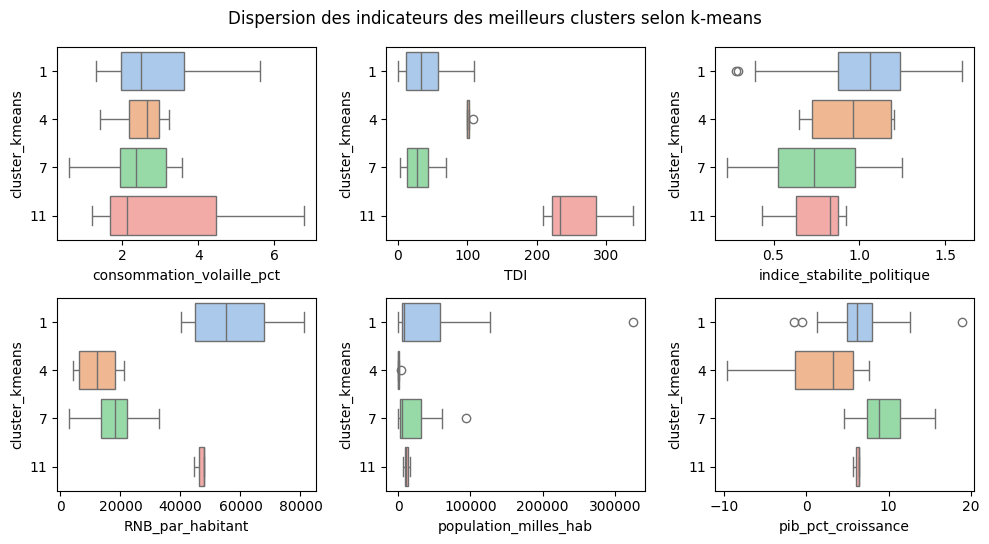

In [386]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5.5))

for i, indicateur in enumerate(indicators):
        r = i // 3
        c = i % 3
        sns.boxplot(data=data_set.loc[data_set["cluster_kmeans"].isin([1, 4, 7, 11])].round(2), x=indicateur,
                    y="cluster_kmeans", orient='h',
                    ax=axs[r, c], palette="pastel", hue="cluster_kmeans", legend=False)
        
    
[fig.delaxes(ax) for ax in axs.flatten() if not ax.has_data()]

fig.suptitle('Dispersion des indicateurs des meilleurs clusters selon k-means')

fig.tight_layout()

plt.show()

In [ ]:
#Projection des pays : 

pca=PCA(n_components=4).fit(data_set_only_quant_scaled)
cum_variance_ratio = (pca.explained_variance_ratio_[0]
                          + pca.explained_variance_ratio_[1])

fig, ax = plt.subplots(figsize=(8, 8))


ax.set_aspect('equal')
ax.grid(alpha=0.4)
ax.set_axisbelow(True)

for spine in ax.spines.values():
        spine.set_visible(False)


ax.axhline(y=0, linestyle = '--', linewidth=0.9, color='k')
ax.axvline(x=0, linestyle = '--', linewidth=0.9, color='k')

ax.scatter(pca.transform(data_set_only_quant_scaled)[:, 0], pca.transform(data_set_only_quant_scaled)[:, 1], marker='.')


for i in range(len(pca.transform(data_set_only_quant_scaled))):
        ax.text(
            x=(pca.transform(data_set_only_quant_scaled)[i, 0]+0.04),
            y=(pca.transform(data_set_only_quant_scaled)[i, 1]+0.04),
            s=pays[i], fontsize='x-small'
        )
    

ax.set_xlabel(f'CP{0 + 1} ({pca.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'CP{1 + 1} ({pca.explained_variance_ratio_[1]:.1%})')

ax.set_title(f'Observations sur CP{0 + 1} et CP{1 + 1} '
                 f'({cum_variance_ratio:.1%})')

plt.tight_layout()

plt.show()

In [ ]:
PCA(n_components=4).fit(data_set_only_quant_scaled).transform(data_set_only_quant_scaled)

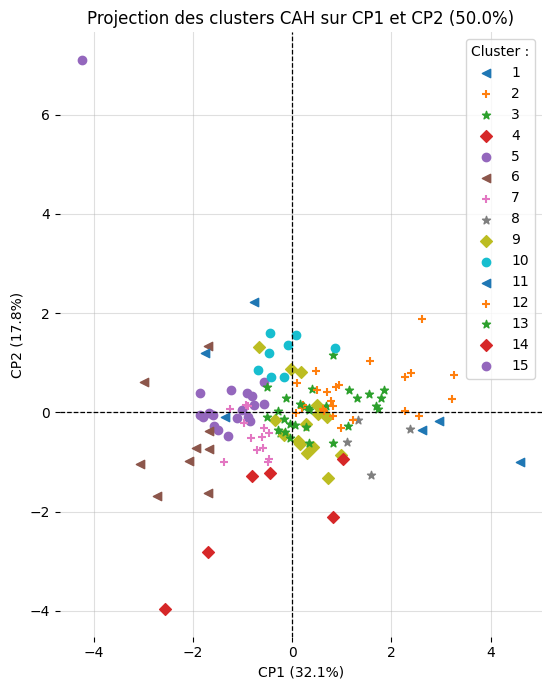

In [421]:
#projection des clusters obtenus par classification ascendante hiérarichique

pca=PCA(n_components=4).fit(data_set_only_quant_scaled)
cum_variance_ratio = (pca.explained_variance_ratio_[0]
                          + pca.explained_variance_ratio_[1])


df = pd.DataFrame(pca.transform(data_set_only_quant_scaled))
df['cluster'] = data_set["cluster"]
n_clusters = len(df['cluster'].unique())
markers = ['<', '+', '*', 'D', 'o']

fig, ax = plt.subplots(figsize=(7, 7))


ax.set_aspect('equal')
ax.grid(alpha=0.4)
ax.set_axisbelow(True)

for spine in ax.spines.values():
        spine.set_visible(False)


ax.axhline(y=0, linestyle = '--', linewidth=0.9, color='k')
ax.axvline(x=0, linestyle = '--', linewidth=0.9, color='k')

    
for i in range(1, (n_clusters+1)):
        j = i % len(markers)
        ax.scatter(
            df.loc[df['cluster'] == i, 0],
            df.loc[df['cluster'] == i, 1],
            marker=markers[j-1], label=i
        )

ax.set_xlabel(f'CP{0 + 1} ({pca.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'CP{1 + 1} ({pca.explained_variance_ratio_[1]:.1%})')

ax.set_title(f'Projection des clusters CAH sur CP{0 + 1} et CP{1 + 1}'
                 f' ({cum_variance_ratio:.1%})')
fig.tight_layout()

plt.legend(title='Cluster :')
 
plt.show()

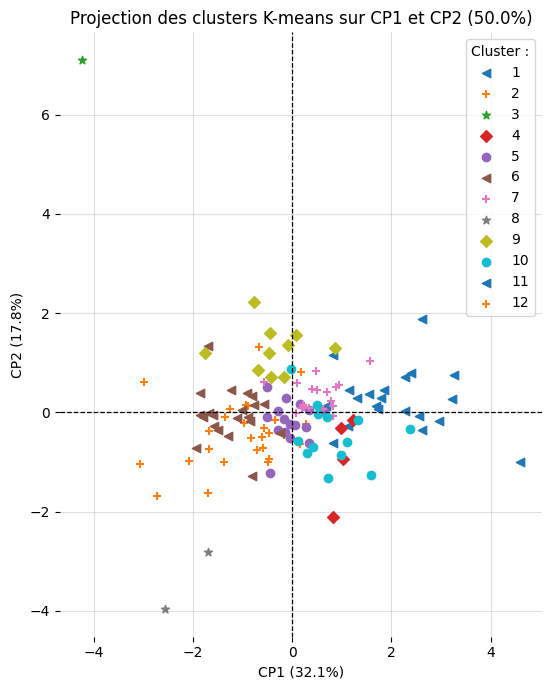

In [420]:
#projection des clusters obtenus par K-Means:

pca=PCA(n_components=4).fit(data_set_only_quant_scaled)
cum_variance_ratio = (pca.explained_variance_ratio_[0]
                          + pca.explained_variance_ratio_[1])


df = pd.DataFrame(pca.transform(data_set_only_quant_scaled))
df['cluster'] = data_set["cluster_kmeans"]
n_clusters = len(df['cluster'].unique())
markers = ['<', '+', '*', 'D', 'o']

fig, ax = plt.subplots(figsize=(7, 7))


ax.set_aspect('equal')
ax.grid(alpha=0.4)
ax.set_axisbelow(True)

for spine in ax.spines.values():
        spine.set_visible(False)

ax.axhline(y=0, linestyle = '--', linewidth=0.9, color='k')
ax.axvline(x=0, linestyle = '--', linewidth=0.9, color='k')


for i in range(1, (n_clusters+1)):
        j = i % len(markers)
        ax.scatter(
            df.loc[df['cluster'] == i, 0],
            df.loc[df['cluster'] == i, 1],
            marker=markers[j-1], label=i
        )
   

ax.set_xlabel(f'CP{0 + 1} ({pca.explained_variance_ratio_[0]:.1%})')
ax.set_ylabel(f'CP{1 + 1} ({pca.explained_variance_ratio_[1]:.1%})')

ax.set_title(f'Projection des clusters K-means sur CP{0 + 1} et CP{1 + 1}'
                 f' ({cum_variance_ratio:.1%})')
fig.tight_layout()

plt.legend(title='Cluster :')
 
plt.show()